In [1]:
!pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [3]:
train_dataset = pd.read_csv("Google_Stock_Price_Train.csv")
train_dataset = train_dataset.iloc[:, 1:2]
train_dataset.shape

(1258, 1)

In [4]:
train_dataset

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04
...,...
1253,790.90
1254,790.68
1255,793.70
1256,783.33


In [5]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))

training_set_scaled = sc.fit_transform(train_dataset)

training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [6]:
training_set_scaled[3,0]

0.0915618721631073

In [7]:
X_train = []
y_train = []

# The basic idea is that our RNN is learning from 0 to 59 and learn 60th stock price.
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [8]:
X_train.shape

(1198, 60)

In [9]:
y_train.shape

(1198,)

In [10]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [11]:
X_train.shape

(1198, 60, 1)

In [12]:
regressor = Sequential()

In [13]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],X_train.shape[2])))
regressor.add(Dropout(0.2))

In [14]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [15]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [16]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [17]:
regressor.add(Dense(units = 1))

In [18]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [19]:
regressor.fit(X_train, y_train, epochs = 125, batch_size = 32)

Epoch 1/125
38/38 [==============================] - 7s 50ms/step - loss: 0.0378
Epoch 2/125
38/38 [==============================] - 2s 51ms/step - loss: 0.0068
Epoch 3/125
38/38 [==============================] - 2s 52ms/step - loss: 0.0054
Epoch 4/125
38/38 [==============================] - 2s 50ms/step - loss: 0.0052
Epoch 5/125
38/38 [==============================] - 2s 52ms/step - loss: 0.0051
Epoch 6/125
38/38 [==============================] - 2s 51ms/step - loss: 0.0044
Epoch 7/125
38/38 [==============================] - 2s 50ms/step - loss: 0.0049
Epoch 8/125
38/38 [==============================] - 2s 50ms/step - loss: 0.0044
Epoch 9/125
38/38 [==============================] - 2s 52ms/step - loss: 0.0042
Epoch 10/125
38/38 [==============================] - 2s 50ms/step - loss: 0.0043
Epoch 11/125
38/38 [==============================] - 2s 50ms/step - loss: 0.0042
Epoch 12/125
38/38 [==============================] - 2s 50ms/step - loss: 0.0041
Epoch 13/125
38/38 [=====

38/38 [==============================] - 2s 50ms/step - loss: 0.0014
Epoch 102/125
38/38 [==============================] - 2s 54ms/step - loss: 0.0014
Epoch 103/125
38/38 [==============================] - 2s 58ms/step - loss: 0.0017
Epoch 104/125
38/38 [==============================] - 2s 52ms/step - loss: 0.0015
Epoch 105/125
38/38 [==============================] - 2s 52ms/step - loss: 0.0013
Epoch 106/125
38/38 [==============================] - 2s 52ms/step - loss: 0.0013
Epoch 107/125
38/38 [==============================] - 2s 52ms/step - loss: 0.0013
Epoch 108/125
38/38 [==============================] - 2s 54ms/step - loss: 0.0013
Epoch 109/125
38/38 [==============================] - 2s 54ms/step - loss: 0.0014
Epoch 110/125
38/38 [==============================] - 2s 56ms/step - loss: 0.0017
Epoch 111/125
38/38 [==============================] - 2s 57ms/step - loss: 0.0015
Epoch 112/125
38/38 [==============================] - 2s 55ms/step - loss: 0.0014
Epoch 113/125
38/3

In [20]:
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [21]:
total_dataset = pd.concat((dataset_test['Open'], dataset_train['Open']),axis=0)
total_dataset

0       778.81
1       788.36
2       786.08
3       795.26
4       806.40
         ...  
1253    790.90
1254    790.68
1255    793.70
1256    783.33
1257    782.75
Name: Open, Length: 1278, dtype: float64

In [22]:
inputs = total_dataset[len(total_dataset) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
inputs

C:\Users\FLCS\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.92914279],
       [0.91334921],
       [0.88550115],
       [0.90289456],
       [0.89383511],
       [0.89993675],
       [0.91269812],
       [0.917665  ],
       [0.91130292],
       [0.91811147],
       [0.93176576],
       [0.94402485],
       [0.93686286],
       [0.9233946 ],
       [0.9277662 ],
       [0.93444453],
       [0.92493861],
       [0.92106928],
       [0.92438053],
       [0.93048218],
       [0.9299055 ],
       [0.93113327],
       [0.92750577],
       [0.94415507],
       [0.93876032],
       [0.93403527],
       [0.93483518],
       [0.9313937 ],
       [0.94636878],
       [0.96569685],
       [0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.886

In [23]:
X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [24]:
X_test.shape

(20, 60, 1)

In [25]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price

1/1 [==============================] - 1s 1s/step


array([[0.89299476],
       [0.8762449 ],
       [0.8756151 ],
       [0.88651705],
       [0.8910626 ],
       [0.89875734],
       [0.9091487 ],
       [0.9178678 ],
       [0.9277538 ],
       [0.9352789 ],
       [0.9380616 ],
       [0.94110334],
       [0.9356625 ],
       [0.9368324 ],
       [0.9397781 ],
       [0.93908644],
       [0.9370322 ],
       [0.9360641 ],
       [0.9384229 ],
       [0.9324193 ]], dtype=float32)

In [26]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price

array([[759.15826],
       [750.1542 ],
       [749.8156 ],
       [755.6761 ],
       [758.11957],
       [762.256  ],
       [767.8419 ],
       [772.529  ],
       [777.8433 ],
       [781.8885 ],
       [783.38434],
       [785.0195 ],
       [782.0947 ],
       [782.72363],
       [784.30707],
       [783.9353 ],
       [782.831  ],
       [782.3106 ],
       [783.5786 ],
       [780.3513 ]], dtype=float32)

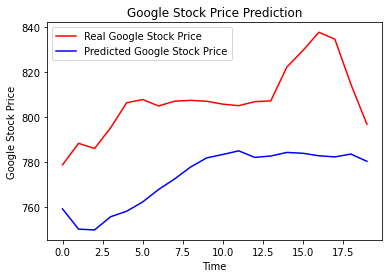

In [27]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()